In [14]:
%load_ext autoreload
%autoreload 2

from vtspy import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Step 1. Generate a configuration file for Fermipy

In [15]:
ls ./veritas

95127.anasum.fits  95128.anasum.root  95130.anasum.log   obs-index.fits.gz
95127.anasum.log   95129.anasum.fits  95130.anasum.root  output.pickle
95127.anasum.root  95129.anasum.log   analyzed.pickle    simple.pickle
95128.anasum.fits  95129.anasum.root  hdu-index.fits.gz
95128.anasum.log   95130.anasum.fits  initial.pickle


In [16]:

config = JointConfig(files="./veritas/")
# or FermipyConfig(files="./veritas/95127.anasum.fits")

2022-06-16 13:41:12 INFO    : a configuration file (config.yaml) is created.


In [17]:
config.print_config()

2022-06-16 13:41:13 INFO    : 
fermi:
  data:
    evfile: ./fermi/EV00.lst
    scfile: ./fermi/SC00.fits
    ltcube: null
  binning:
    roiwidth: 12
    binsz: 0.08
    binsperdec: 8
    coordsys: CEL
    projtype: WCS
  selection:
    emin: 100
    emax: 300000
    tmin: 599529605.0
    tmax: 599616005.0
    zmax: 105
    evclass: 128
    evtype: 3
    glon: 186.3593855387067
    glat: 82.73442268671826
    ra: 185.3412470056114
    dec: 30.17694222440679
    target: 1ES1218+304
  gtlike:
    edisp: true
    irfs: P8R3_SOURCE_V3
    edisp_disable:
    - isodiff
    - galdiff
  model:
    src_roiwidth: 12
    galdiff: $FERMI_DIFFUSE_DIR/gll_iem_v07.fits
    isodiff: $FERMI_DIFFUSE_DIR/iso_P8R3_SOURCE_V3_v1.txt
    catalogs: /Users/dtak/Research/scripts/vts-fermi/vtspy/refdata/gll_psc_v22.fit
  fileio:
    outdir: ./fermi/
    logfile: ./fermi/log/fermipy.log
    usescratch: false
veritas:
  background:
    file: Hipparcos_MAG8_1997
    distance: 1.75
    magnitude: 7
  fileio:
    out

## Step 2. Download Fermi-LAT data

In [18]:
dwn = DownloadFermiData(verbosity=1)

2022-06-16 13:41:18 INFO    : Query parameters:
2022-06-16 13:41:18 INFO    :                     coordfield = 185.3412470056114,30.17694222440679
2022-06-16 13:41:18 INFO    :                    coordsystem = J2000
2022-06-16 13:41:18 INFO    :                     shapefield = 15
2022-06-16 13:41:18 INFO    :                      timefield = 599529605.0,599616005.0
2022-06-16 13:41:18 INFO    :                       timetype = MET
2022-06-16 13:41:18 INFO    :                    energyfield = 100,300000
2022-06-16 13:41:18 INFO    :         photonOrExtendedOrNone = Extended
2022-06-16 13:41:18 INFO    :                    destination = query
2022-06-16 13:41:18 INFO    :                     spacecraft = checked
2022-06-16 13:41:19 INFO    : The estimated time is about 10 seconds.
2022-06-16 13:41:23 INFO    : Downloading... https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L220616074120F357373F03_EV00.fits
2022-06-16 13:41:24 INFO    : Downloading... https://fermi.gsfc.nasa.gov/F

## Step 3. Analyze the Ferrmi-LAT data

### Initiate fermipy

In [20]:
fermi = FermiAnalysis()

2022-06-16 13:41:37 INFO    : Initializing the Fermi-LAT analysis...
2022-06-16 13:41:40 INFO    : The setup and configuration is found [state_file = initial]. Loading the configuration...
2022-06-16 13:41:51 INFO    : The target, 4FGL J1221.3+3010, is associated with 2 source(s).
2022-06-16 13:41:51 INFO    : Completed (Fermi-LAT initialization).


In [21]:
fermi.print_model()

2022-06-16 13:41:51 ERROR   GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
4FGL J1221.3+3010      0.000  13.587  0.000985   1.20     44.96         5.6     
4FGL J1217.9+3007      0.753   1.087  8.83e-05   1.97      7.11         7.2     
4FGL J1225.9+2951      1.038   0.870  5.21e-06   2.35       nan         0.5     
4FGL J1221.5+2814      1.930   0.483  3.58e-05   2.16      3.83         4.5     
4FGL J1231.7+2847      2.641   1.362  2.78e-05   1.99     11.14         2.4     
4FGL J1208.1+3017      2.871   0.414  1.18e-06   1.79       nan         0.1     
4FGL J1220.1+3432      4.378   1.647  3.92e-06   2.07       nan         0.4     
4FGL J1205.8+3321      4.589   0.684  1.45e-06   2.68       nan         0.3     
4FGL J1159.5+2914      4.832   0.061  5.91e-06   2.42      0.11         0.8     
4FGL J1215.1+3513      5.219   0.575  1.41e-06   2.64 

### Check whether our source is in the list

In [22]:
fermi.print_association()

2022-06-16 13:41:51 INFO    : 0) 4FGL J1221.3+3010:['PG 1218+304', '1ES 1218+304']
2022-06-16 13:41:51 INFO    : 1) 4FGL J1217.9+3007:['B2 1215+30', '1ES 1215+303']
2022-06-16 13:41:51 INFO    : 2) 4FGL J1225.9+2951:[]
2022-06-16 13:41:51 INFO    : 3) 4FGL J1221.5+2814:['W Comae']
2022-06-16 13:41:51 INFO    : 4) 4FGL J1231.7+2847:['B2 1229+29']
2022-06-16 13:41:51 INFO    : 5) 4FGL J1208.1+3017:['GB6 J1208+3015']
2022-06-16 13:41:51 INFO    : 6) 4FGL J1220.1+3432:['GB2 1217+348']
2022-06-16 13:41:51 INFO    : 7) 4FGL J1205.8+3321:['SDSS J120542.82+332146.9']
2022-06-16 13:41:51 INFO    : 8) 4FGL J1159.5+2914:['Ton 599', '3EG J1200+2847', 'TON 0599']
2022-06-16 13:41:51 INFO    : 9) 4FGL J1215.1+3513:['7C 1212+3524']
2022-06-16 13:41:51 INFO    : 10) 4FGL J1230.2+2517:['ON 246', 'S3 1227+25']
2022-06-16 13:41:51 INFO    : 11) 4FGL J1224.4+2436:['MS 1221.8+2452']
2022-06-16 13:41:51 INFO    : 12) 4FGL J1212.2+2442:['NVSS J121219+244130']
2022-06-16 13:41:51 INFO    : 13) 4FGL J1241.5+34

### Perform a simple analysis

In [23]:
o = fermi.fit(return_output=True)

2022-06-16 13:41:59 INFO    : Fit successfully.
2022-06-16 13:41:59 WARNING : Format %s cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.
2022-06-16 13:41:59 WARNING : Format %f cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.
2022-06-16 13:41:59 WARNING : Format %s cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.


In [24]:
fermi.print_model()

2022-06-16 13:42:09 ERROR   GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
4FGL J1221.3+3010      0.000  12.731   0.00104   1.16     49.12         5.2    *
4FGL J1217.9+3007      0.753   0.738  4.97e-05   2.68      6.77        10.6    *
4FGL J1225.9+2951      1.038   2.438  1.46e-05   2.35      3.23         1.3    *
4FGL J1221.5+2814      1.930   0.383  2.84e-05   2.16      2.91         3.6    *
4FGL J1231.7+2847      2.641   0.405  0.000519   0.77     15.47         1.0    *
4FGL J1208.1+3017      2.871   0.000  7.71e-11   1.79     -0.00         0.0    *
4FGL J1220.1+3432      4.378   1.647  3.92e-06   2.07       nan         0.4     
4FGL J1205.8+3321      4.589   0.684  1.45e-06   2.68       nan         0.3     
4FGL J1159.5+2914      4.832   0.061  5.91e-06   2.42      0.11         0.8     
4FGL J1215.1+3513      5.219   0.575  1.41e-06   2.64 

### Remove weak sources

In [25]:
fermi.remove_weak_srcs()
fermi.fit()

2022-06-16 13:42:09 INFO    : 8 sources are deleted.
2022-06-16 13:42:10 INFO    : Fit successfully.
2022-06-16 13:42:10 WARNING : Format %s cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.
2022-06-16 13:42:10 WARNING : Format %f cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.
2022-06-16 13:42:10 WARNING : Format %s cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.


In [26]:
fermi.print_model()

2022-06-16 13:42:20 ERROR   GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
4FGL J1221.3+3010      0.000  12.731   0.00104   1.16     49.03         5.2    *
4FGL J1217.9+3007      0.753   0.738  4.94e-05   2.70      6.73        10.6    *
4FGL J1225.9+2951      1.038   2.438  1.46e-05   2.35      3.21         1.3    *
4FGL J1221.5+2814      1.930   0.384  2.85e-05   2.16      2.89         3.6    *
4FGL J1231.7+2847      2.641   0.404  0.000521   0.77     15.42         1.0    *
4FGL J1159.5+2914      4.832   0.061  5.91e-06   2.42      0.11         0.8     
4FGL J1230.2+2517      5.249   0.510  1.84e-05   2.16      1.82         1.9     
isodiff                  ---   1.527    0.0773   2.24     65.76        47.5    *
galdiff                  ---   0.100    0.0266   0.00     -0.02         2.2    *



In [27]:
fermi.print_params()

2022-06-16 13:42:20 ERROR   GTAnalysis.print_params(): 
 idx parname                  value     error       min       max     scale free
--------------------------------------------------------------------------------
4FGL J1159.5+2914
   0 norm                    0.0606         0     1e-05     1e+03     1e-10     
   1 alpha                     2.17         0        -5         5         1     
   2 beta                    0.0675         0        -2         2         1     
   3 Eb                         485         0       485       485         1     
4FGL J1217.9+3007
   4 norm                     0.738     0.611     1e-05     1e+03     1e-11    *
   5 alpha                     2.58     0.791        -5         5         1    *
   6 beta                    0.0529     0.394        -2         2         1    *
   7 Eb                    1.07e+03         0  1.07e+03  1.07e+03         1     
4FGL J1221.3+3010
   8 Prefactor                 12.7      6.75     1e-05     1e+03     1e-13    *

### Check TS distribution

In [28]:
fermi.analysis(jobs=["ts"])

2022-06-16 13:42:20 INFO    : Generating a TS map...
2022-06-16 13:43:02 WARNING GTAnalysis.tsmap(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /Users/dtak/Research/FermiAnalysis/1ES1218+304/./fermi/ts_pointsource_powerlaw_2.00_tsmap.npy
2022-06-16 13:43:02 INFO    : Generating the TS map is completed.
2022-06-16 13:43:02 WARNING : Format %s cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.
2022-06-16 13:43:02 WARNING : Format %f cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.
2022-06-16 13:43:02 WARNING : Format %s cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.


2022-06-16 14:18:28 INFO    : Loading the output file...


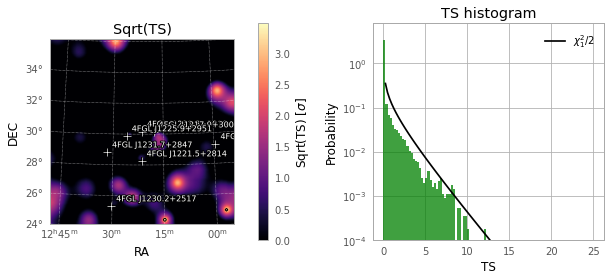

In [66]:
fermi.plot(["sqrt_ts", "ts_hist"])

### Check resid distribution

In [31]:
fermi.analysis(jobs=["resid"])

2022-06-16 13:44:15 INFO    : Generating a residual distribution...
2022-06-16 13:44:24 WARNING GTAnalysis.residmap(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /Users/dtak/Research/FermiAnalysis/1ES1218+304/./fermi/resid_pointsource_powerlaw_2.00_residmap.npy
2022-06-16 13:44:24 INFO    : Generating the residual distribution is completed.
2022-06-16 13:44:24 WARNING : Format %s cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.
2022-06-16 13:44:24 WARNING : Format %f cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.
2022-06-16 13:44:24 WARNING : Format %s cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.


2022-06-16 14:18:33 INFO    : Loading the output file...


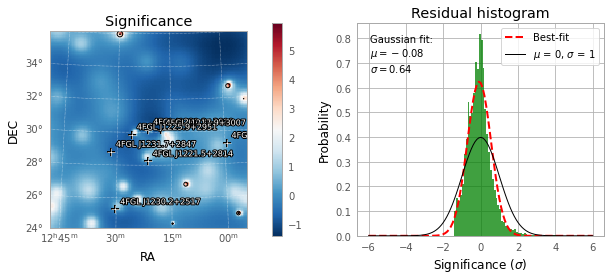

In [67]:
fermi.plot(["sigma", "resid"])

### Calculate SED

In [33]:
fermi.analysis(jobs=["sed"])

2022-06-16 13:44:35 INFO    : Generating a SED... 
/Users/dtak/Software/miniconda3/envs/fermipy/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
2022-06-16 13:44:42 INFO    : Generating the SED is completed.
2022-06-16 13:44:42 WARNING : Format %s cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.
2022-06-16 13:44:42 WARNING : Format %f cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.
2022-06-16 13:44:42 WARNING : Format %s cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword.


2022-06-16 14:10:22 INFO    : Loading the output file...


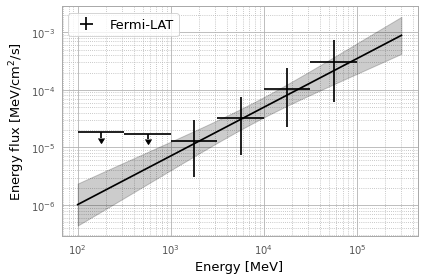

In [55]:
fermi.plot("sed")

## Step 4. Construct dataset for the joint-fit analysis

In [36]:
fermi.construct_dataset()

2022-06-16 13:45:41 INFO    : Loading the Fermi-LAT events...
2022-06-16 13:45:41 INFO    : Loading the Fermi-LAT IRFs...
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
2022-06-16 13:45:41 WARNING : FITSFixedWarning: RADECSYS= 'FK5 ' 
the RADECSYS keyword is deprecated, use RADESYSa.
Set MJD-OBS to 58849.000000 from DATE-OBS.
Set MJD-END to 58850.000000 from DATE-END'. [astropy.wcs.wcs]
2022-06-16 13:45:41 WARNING : FITSFixedWarning: 'datfix' made the change 'Set DATEREF to '2001-01-01T00:01:04.184' from MJDREF.
Set MJD-OBS to 58849.000000 from DATE-OBS.
Set MJD-END to 58850.000000 from DATE-END'.
2022-06-16 13:45:41 INFO    : Loading the Fermi-LAT models...
2022-06-16 13:45:43 INFO    : Ready to perform a gammapy analysis.


### Peek events and irfs

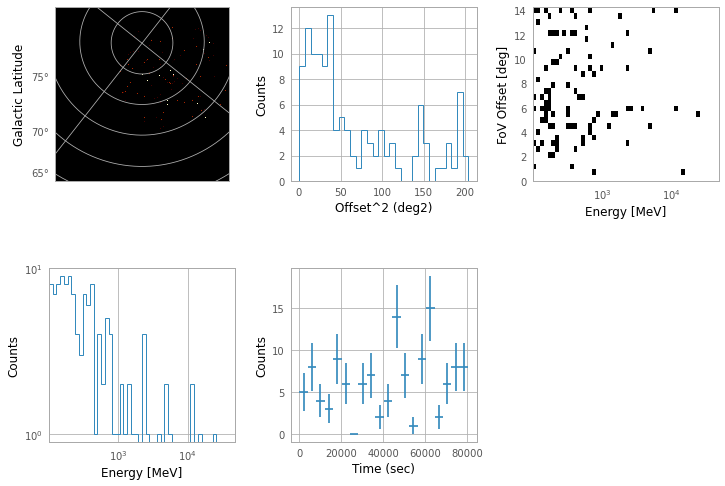

In [37]:
fermi.peek_events()

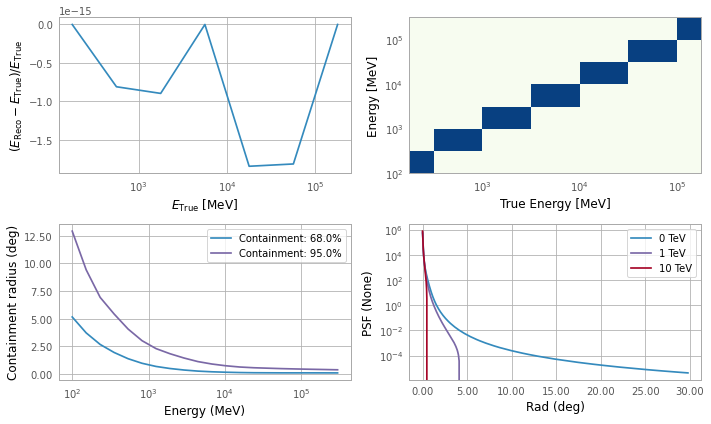

In [38]:
fermi.peek_irfs()

### One can fit the Fermi-LAT datasets with gammapy (which takes long time)

In [39]:
from gammapy.modeling import Fit

In [40]:
gfit = Fit()
gfit.run(fermi.datasets)

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 397
	total stat : 1019.59

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

2022-06-16 14:20:47 INFO    : Loading the output file...


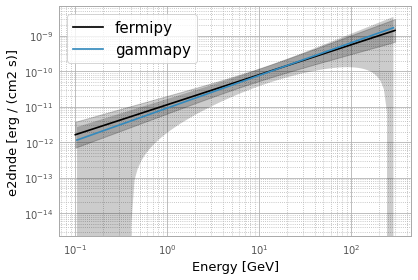

In [71]:
fermi.plot("sed", erg=True, units="GeV", show_flux_points=False, show_band=True, label="fermipy")
gamma_result.plot([100*u.MeV, 300*u.GeV], sed_type="e2dnde", label="gammapy")
gamma_result.plot_error([100*u.MeV, 300*u.GeV], sed_type="e2dnde")
plt.legend(fontsize=15)